<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/main_trans_anomalydetection_iso_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# 1. خواندن فایل اکسل
df = pd.read_excel("output_main_trans_g11.xlsx")

In [3]:
# 2. بررسی اولیه
print("ستون‌ها:", df.columns)
print("تعداد داده‌ها:", len(df))

ستون‌ها: Index(['AssetID_8312', 'AssetID_8313', 'AssetID_8314', 'date'], dtype='object')
تعداد داده‌ها: 3365


In [4]:
# 4. حذف داده‌های ناقص
df_clean = df.dropna()

In [5]:
# 5. انتخاب ویژگی‌ها برای مدل
features = ['AssetID_8312', 'AssetID_8313']
X = df_clean[features]

In [6]:
# 6. نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 7. پیاده‌سازی Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_clean['anomaly_score'] = model.fit_predict(X_scaled)

/tmp/ipython-input-3395165765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly_score'] = model.fit_predict(X_scaled)


In [8]:
# 8. برچسب‌گذاری
df_clean['anomaly_label'] = df_clean['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

/tmp/ipython-input-538586233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly_label'] = df_clean['anomaly_score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


In [9]:
# 9. ذخیره خروجی
df_clean.to_excel("output_with_anomalies.xlsx", index=False)

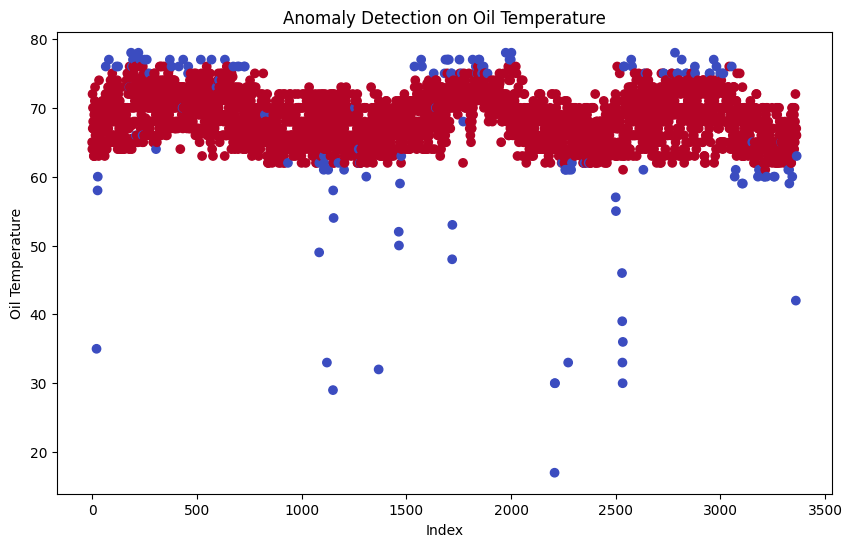

In [11]:
# 10. نمایش گرافیکی (اختیاری)
plt.figure(figsize=(10, 6))
plt.scatter(df_clean.index, df_clean['AssetID_8312'], c=df_clean['anomaly_score'], cmap='coolwarm')
plt.title("Anomaly Detection on Oil Temperature")
plt.xlabel("Index")
plt.ylabel("Oil Temperature")
plt.show()